<p style="text-align:center"> 
    <a href="https://www.linkedin.com/in/flavio-aguirre-12784a252/" target="_blank"> 
    <img src="../../assets/logo.png" width="200" alt="Flavio Aguirre Logo"> 
    </a>
</p>

# <h1 align="center"><font size="7"><strong>Weather Wise</strong></font></h1>
<hr>

## Feature engineering

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [52]:
df = pd.read_csv("../../data/processed/weatherAUS-data-clean.csv")

### Let's define the feature and target data frames

In [53]:
X = df.drop(columns='RainToday', axis=1)
y = df['RainToday']

Let's briefly analyze our feature set and try to figure out if, for example, the classes are balanced...

In [68]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,7557.0,10.471589,4.480357,-2.1,7.3,10.1,13.6,30.5
MaxTemp,7557.0,20.698743,6.525832,8.4,15.6,19.4,24.6,46.8
Rainfall,7557.0,1.705836,4.993210,0.0,0.0,0.0,1.0,84.0
Evaporation,7557.0,4.666905,3.321487,0.0,2.2,4.0,6.4,23.8
Sunshine,7557.0,6.431878,3.894928,0.0,3.2,6.6,9.6,13.9
WindGustSpeed,7557.0,43.741829,15.606706,9.0,31.0,41.0,54.0,122.0
WindSpeed9am,7557.0,16.551145,10.821580,2.0,9.0,13.0,22.0,67.0
WindSpeed3pm,7557.0,20.133651,9.472907,2.0,13.0,19.0,26.0,76.0
Humidity9am,7557.0,71.933704,16.612418,11.0,62.0,72.0,84.0,100.0
Humidity3pm,7557.0,52.193992,17.635123,6.0,41.0,51.0,63.0,100.0


In [69]:
frequency = X['RainYesterday'].value_counts(normalize=True)
frequency

RainYesterday
No     0.758899
Yes    0.241101
Name: proportion, dtype: float64

### With these counts, we can see:
- How often it rains annually in the Melbourne area.
- If we assumed it wouldn't rain every day, we'd be correct almost ``76%`` of the time.
- We also see that this is a balanced dataset

### Engineering new meteorological features

If we investigate, meteorologists also use variables derived from other columns, so we are going to create our own.

In [56]:
# Differences between temperatures
df['TempDiff'] = df['MaxTemp'] - df['MinTemp']
df['TempChange'] = df['Temp3pm'] - df['Temp9am']

# Pressure difference
df['PressureDiff'] = df['Pressure3pm'] - df['Pressure9am']

# Humidity difference
df['HumidityDiff'] = df['Humidity3pm'] - df['Humidity9am']

# Wind speed difference
df['WindSpeedDiff'] = df['WindSpeed3pm'] - df['WindSpeed9am']

# Daily averages
df['AvgHumidity'] = df[['Humidity9am', 'Humidity3pm']].mean(axis=1)
df['AvgTemp'] = df[['Temp9am', 'Temp3pm']].mean(axis=1)

# Climate interactions
df['RainfallPerSunshine'] = df['Rainfall'] / (df['Sunshine'] + 0.1) # avoid division by zero

We went from 25 features to 31

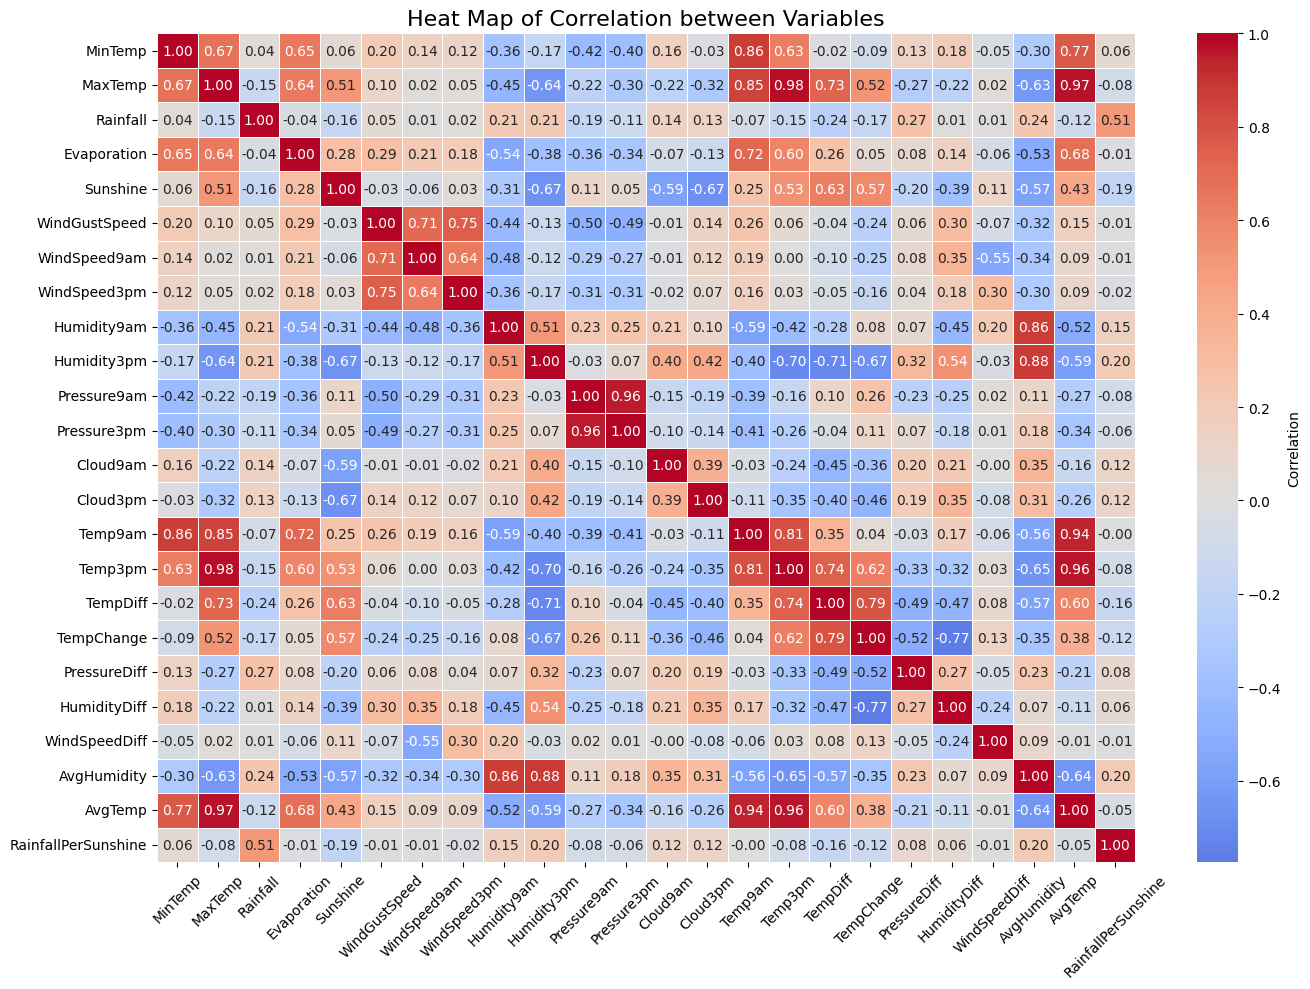

In [ ]:
# Numeric variables only
corr = df.corr(numeric_only=True)

plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0, 
            linewidths=0.5, cbar_kws={'label': 'Correlation'})
plt.title("Heat Map of Correlation between Variables", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("../../reports/figures/heatmap-correlation-between-variables.png", dpi=300)
plt.show()

This helps us validate whether our variables make sense.

### We are now ready to train our regressor model.

Now we can proceed to save our new dataset with our new features

In [58]:
df.to_csv("../../data/processed/weatherAUS-data-engineered.csv", index=False)
# Save the correlation matrix to a CSV file
corr.to_csv("../../data/processed/weatherAUS-correlation-matrix.csv")

<hr>

## Author

<a href="https://www.linkedin.com/in/flavio-aguirre-12784a252/">**Flavio Aguirre**</a>
<br>
<a href="https://coursera.org/share/e27ae5af81b56f99a2aa85289b7cdd04">***Data Scientist***</a>

<br>